# Motion fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy
from pathlib import Path
from scipy.optimize import curve_fit
from lib.folder import FolderMg

In [4]:
dataPath = Path("data").joinpath("motion_tracking")
dataMg = FolderMg(dataPath)
dataMg.ls()
file = dataMg.files[2]
print("Read file", file.name)


Current Folder 'data' contains NO folders


Current Folder 'data' contains 6 files, which are:
  - 202308011345.csv
  - 202308011641.csv
  - 202308011646.csv
  - 202308011653.csv
  - curve_fit.m
  - ...
Read file 202308011646.csv


In [5]:
df = pd.read_csv(file,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.690880e+09,0.999999,0.001462,0.0,-0.316101,-0.001462,0.999999,0.0,0.492550,0.0,...,0.0,0.0,0.0,1.0,-0.566087,14.610942,1.167925,1.637484,0.127070,0.991894
1,1.690880e+09,0.999997,0.002612,0.0,-0.379368,-0.002612,0.999997,0.0,-6.669804,0.0,...,0.0,0.0,0.0,1.0,-3.015092,3.538162,-1.546675,1.641763,0.128208,0.991747
2,1.690880e+09,0.999999,-0.001159,0.0,3.288073,0.001159,0.999999,0.0,-29.747685,0.0,...,0.0,0.0,0.0,1.0,-3.087324,3.539478,-1.523142,1.687844,0.128846,0.991665
3,1.690880e+09,0.999989,-0.004730,0.0,7.011658,0.004730,0.999989,0.0,-45.291665,0.0,...,0.0,0.0,0.0,1.0,3.176726,3.536127,1.599353,1.736152,0.131148,0.991363
4,1.690880e+09,1.000000,-0.000905,0.0,4.306250,0.000905,1.000000,0.0,-46.460082,0.0,...,0.0,0.0,0.0,1.0,3.210475,3.528672,1.523776,1.775315,0.130524,0.991445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.690880e+09,0.999923,0.012442,0.0,0.456792,-0.012442,0.999923,0.0,51.363010,0.0,...,0.0,0.0,0.0,1.0,-20.167206,3.532437,20.208957,10.937495,1.000000,0.000000
507,1.690880e+09,0.999974,-0.007211,0.0,17.809472,0.007211,0.999974,0.0,75.272898,0.0,...,0.0,0.0,0.0,1.0,20.181917,3.532381,29.627485,10.947674,1.000000,0.000000
508,1.690880e+09,0.999745,-0.022580,0.0,28.068270,0.022580,0.999745,0.0,85.256796,0.0,...,0.0,0.0,0.0,1.0,4.260510,3.978228,11.653944,10.760880,1.000000,0.000000
509,1.690880e+09,0.999889,-0.014910,0.0,23.883003,0.014910,0.999889,0.0,85.696695,0.0,...,0.0,0.0,0.0,1.0,20.060757,3.532569,23.371254,10.857791,1.000000,0.000000


In [20]:
pos_collection = []
for index, row in df.iterrows():
    transform_matrix = row[1:17]
    pos = np.array([transform_matrix[4],transform_matrix[8],transform_matrix[12]])
    pos_collection.append(pos)
pos_collection = np.array(pos_collection)
print(pos_collection.shape)


(511, 3)


In [21]:
timestamp= df[[0]].to_numpy().squeeze()
print(timestamp.shape)

(511,)


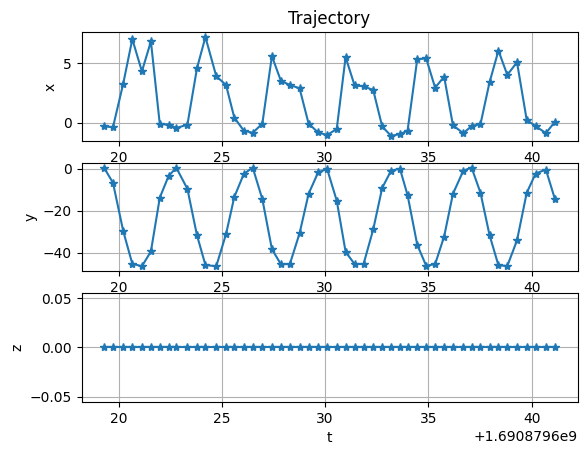

In [22]:
T = len(timestamp)
T = 50
trajectory = pos_collection[:T]
t = timestamp[:T]
x=trajectory[:,0]
y=trajectory[:,1]

fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, trajectory[:, 1], "*-")
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()

# Kalman Filter with simple example

1d case

xk = xk-1 + xdotk-1 * dt + 0.5 * xddotk-1 * dt^2

xdotk = xdotk-1 + xddotk-1 * dt

xdotdotk = xdotdotk-1


X = [xk, xdotk, xdotdotk] a 3x1 vector

A = [1, dt, 0.5*dt^2; 0, 1, dt; 0, 0, 1] a 3x3 matrix

Xk = A * Xk-1

zk = Hk * Xk 

/var/folders/h0/_pf7ww5x5clcvjpg4x76lqz80000gn/T/ipykernel_50173/2332747026.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_est[k] = X[0]


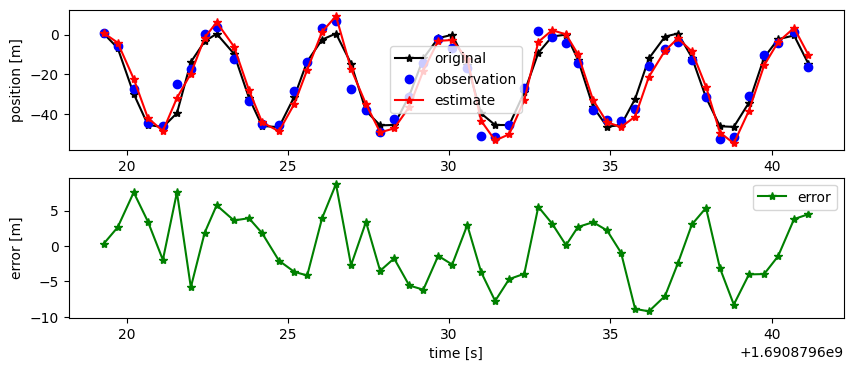

In [23]:
N = len(y)
yob = y + np.random.randn(N) * 5
dt = np.diff(t).mean()

X = np.zeros((3, 1))
F = np.array([[1, dt, 0.5*dt**2], [0, 1, dt], [0, 0, 1]])
H = np.array([[1, 0, 0]])
P = np.eye(3)
Q = np.eye(3) * 0.5
R = np.eye(1) * 0.5

x_est = np.zeros(N)
for k, y_k in enumerate(yob):
    X = F @ X
    P = F @ P @ F.T + Q
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    X = X + K @ (y_k - H @ X)
    P = (np.eye(3) - K @ H) @ P
    x_est[k] = X[0]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(211)
ax.plot(t, y, 'k*-', label='original')
ax.plot(t, yob, 'bo', label='observation')
ax.plot(t, x_est,'r*-', label='estimate')
ax.legend()
ax.set_xlabel('time [s]')
ax.set_ylabel('position [m]')
ax = fig.add_subplot(212)
ax.plot(t, x_est - y, 'g*-', label='error')
ax.legend()
ax.set_xlabel('time [s]')
ax.set_ylabel('error [m]')
plt.show()

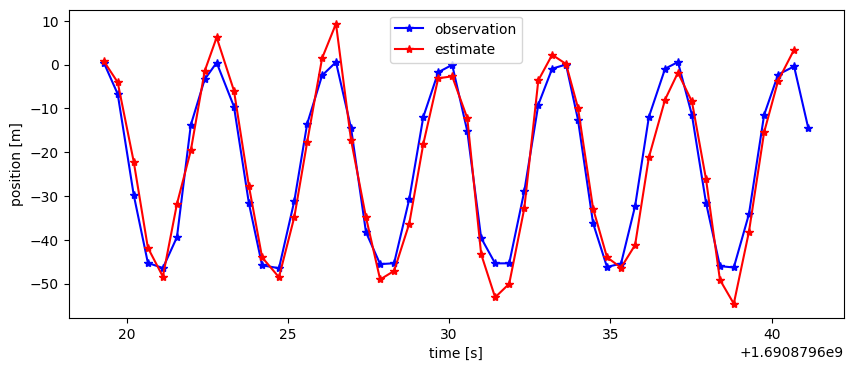

In [24]:
# create an animation of the motion of the ball
fig,ax = plt.subplots(1,1,figsize=(10,4))
# fig = plt.figure(figsize=(10, 4))
# ax = fig.add_subplot(211)
# ax.plot(t, y, 'b*-', label='observation')
# ax.plot(t, x_est,'r*-', label='estimate')
# ax.legend()
# ax.set_xlabel('time [s]')
# ax.set_ylabel('position [m]')
# ax = fig.add_subplot(212)
# ax.plot(t, x_est - y, 'g*-', label='error')
# ax.legend()
# ax.set_xlabel('time [s]')
# ax.set_ylabel('error [m]')
# plt.show()

def update(i):
    ax.clear()
    ax.plot(t, y, 'b*-', label='observation')
    ax.plot(t[:i], x_est[:i],'r*-', label='estimate')
    ax.legend()
    ax.set_xlabel('time [s]')
    ax.set_ylabel('position [m]')
    
ani = animation.FuncAnimation(fig, update, frames=len(t), interval=100)
ani.save('KF_motion_estimation.gif', writer='imagemagick')
plt.show()


2d case
xk = xk-1 + xdotk-1 * dt + 0.5 * xddotk-1 * dt^2
xdotk = xdotk-1 + xddotk-1 * dt
xdotdotk = xdotdotk-1
y is similar

X = [x, xdot, xdotdot, y, ydot, ydotdot], a 6x1 vector

# Kalman Filter Predict Respiratory Motion

## No respiratory motion model

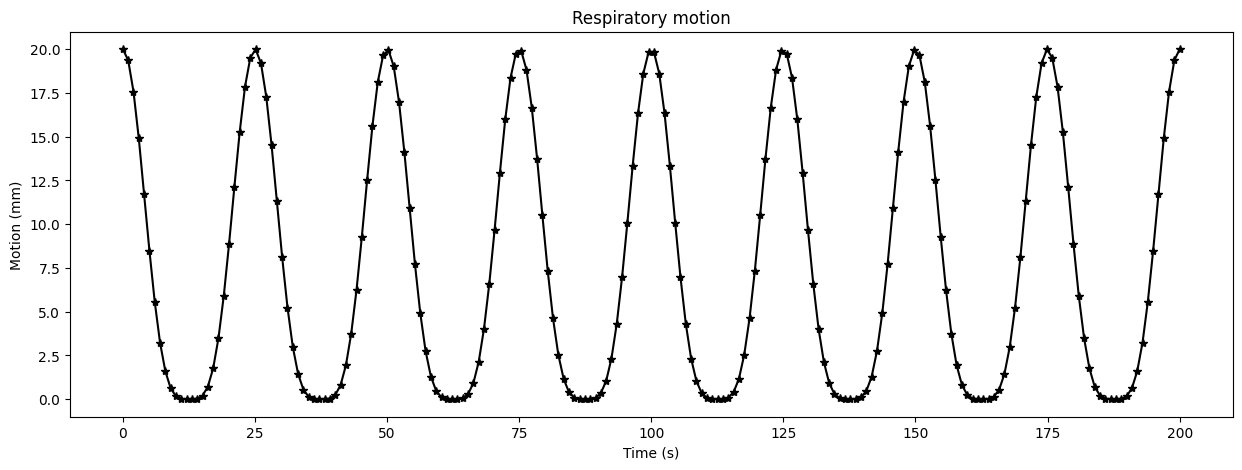

In [2]:
pn = 200
w = 4 * np.pi / pn *2
A = 20
pt = np.linspace(0, pn, pn)
respiratory_motion = A * np.cos(w * pt)**4

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(pt, respiratory_motion, 'k*-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Motion (mm)')
ax.set_title('Respiratory motion')
plt.show()

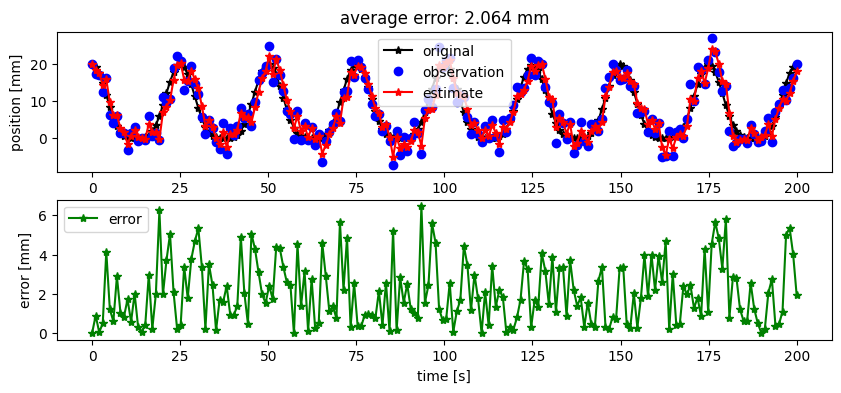

In [28]:
yob = respiratory_motion + np.random.randn(pn) * 3
pnob = pn + np.random.randn(pn) * 0.2
pnob = np.hstack((0, pnob))

x_est = np.zeros(pn)
for k, y_k in enumerate(yob):
    dt = pnob[k+1] - pnob[k]
    F = np.array([[1, dt, 0.5*dt**2], [0, 1, dt], [0, 0, 1]])
    X = F @ X
    P = F @ P @ F.T + Q
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    X = X + K @ (y_k - H @ X)
    P = (np.eye(3) - K @ H) @ P
    x_est[k] = X[0][0]
    

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(211)
ax.plot(pt, respiratory_motion, 'k*-', label='original')
ax.plot(pt, yob, 'bo', label='observation')
ax.plot(pt, x_est,'r*-', label='estimate')
ax.legend()
ax.set_xlabel('time [s]')
ax.set_ylabel('position [mm]')
ax2 = fig.add_subplot(212)
ax2.plot(pt, np.abs(x_est - respiratory_motion), 'g*-', label='error')
ax2.legend()
ax2.set_xlabel('time [s]')
ax2.set_ylabel('error [mm]')
ax.set_title(f"average error: {np.mean(np.abs(x_est - respiratory_motion)):.3f} mm")
plt.show()

## Have respiratory motion model
Unscented Kalman filter

x = A * np.cos(w * t + phi)**4

x[k+1]=f(x[k],us[k])+w[k]

z[k]=h(x[k],um[k])+v[k]

w[k]~(0,Q[k])

v[k]~(0,R[k])

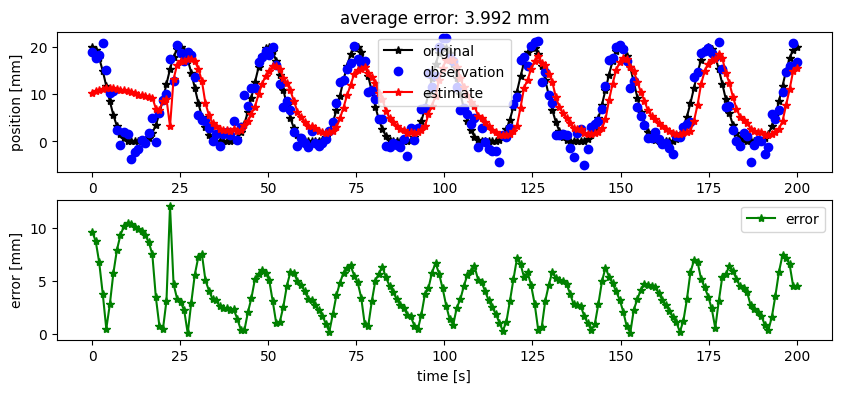

In [21]:
yob = respiratory_motion + np.random.randn(pn) * 2

# define X = [Ak, wk, varphik = wk*tk+ phik]
def fx(X,dt):
    F = np.array([[1,0],[0,1]])
    return F @ X

def hx(X):
    A = X[0]
    varphi = X[1]
    return np.array([A*np.cos(varphi)**4])

from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import JulierSigmaPoints

sigmas = JulierSigmaPoints(n=2, kappa=0.1)
# sigmas = MerweScaledSigmaPoints(n=2, alpha=.01, beta=.05, kappa=-1)
ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=dt, fx=fx, hx=hx, points=sigmas)
ukf.x = np.array([10, 0])
z_std = 0.01
ukf.P *= 0.1
ukf.R = z_std**2
ukf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.4)

x_est = np.zeros(pn)
for k, y_k in enumerate(yob):
    ukf.predict()
    ukf.update(y_k)
    A = ukf.x[0]
    varphi = ukf.x[1]
    x_est[k] = A*np.cos(varphi)**4

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(211)
ax.plot(pt, respiratory_motion, 'k*-', label='original')
ax.plot(pt, yob, 'bo', label='observation')
ax.plot(pt, x_est,'r*-', label='estimate')
ax.legend()
ax.set_xlabel('time [s]')
ax.set_ylabel('position [mm]')
ax2 = fig.add_subplot(212)
ax2.plot(pt, np.abs(x_est - respiratory_motion), 'g*-', label='error')
ax2.legend()
ax2.set_xlabel('time [s]')
ax2.set_ylabel('error [mm]')
ax.set_title(f"average error: {np.mean(np.abs(x_est - respiratory_motion)):.3f} mm")
plt.show()

# Fit sinusoidal function to the motion data

In [ ]:
def fun(t,A,w,phi,B):
    return A*np.sin(w*t+phi)+B

In [ ]:
y = trajectory[:,1]

[0 5]
[11]
0.4505296059143849


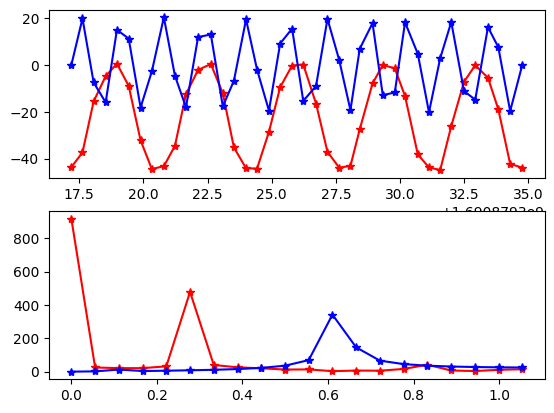

0.2774512448439493 0.6103927386566884


In [ ]:
X=y
N = len(y)

# Compute the FFT
yf = scipy.fftpack.fft(y)
idx_y = np.where(np.abs(yf[:N//2])>200)[0]
print(idx_y)

x = np.linspace(0,N,N)
z = 20*np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
zf = scipy.fftpack.fft(z)
idx_z = np.where(np.abs(zf[:N//2])>200)[0]
print(idx_z)

# frequency
dt = np.diff(t).mean()
print(dt)
freq = np.fft.fftfreq(N, d=dt)

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(t,y,'r*-')
ax.plot(t,z,'b*-')
ax = fig.add_subplot(212)
ax.plot(freq[:N//2],abs(yf[:N//2]),'r*-')
ax.plot(freq[:N//2],abs(zf[:N//2]),'b*-')
plt.show()

guess_freq_y = freq[idx_y[-1]]
guess_freq_z = freq[idx_z[-1]]
print(guess_freq_y, guess_freq_z)

[22.687909331441517, 0.2774512448439493, 0, -22.887259464228315]
inf [inf inf inf inf]
 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  5 had an illegal value


/Users/kexinwei/miniconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


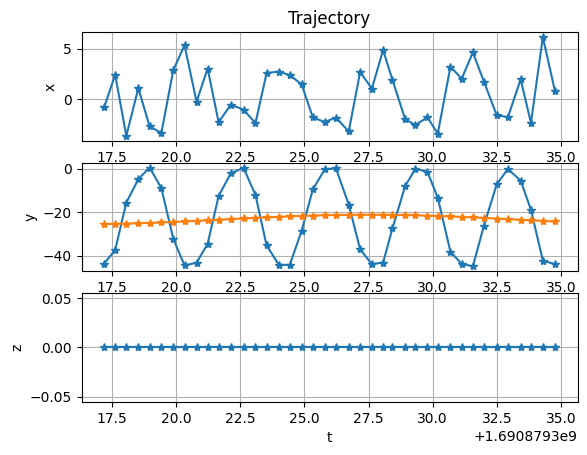

In [ ]:
guess_A = (y.max()-y.min())/2
guess_B = y.mean()
guess_w = guess_freq_y
guess_phi = 0
guess = [guess_A,guess_w,guess_phi,guess_B]
print(guess)
popt, pcov = curve_fit(fun, t, y ,guess)
print(np.linalg.cond(pcov),np.diag(pcov))

fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, y, "*-")
ax.plot(t, fun(t, popt[0],popt[1],popt[2],popt[3]),'*-')
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()

[20.25101287649443, 0.6103927386566884, 0, 1.099298430062845e-12]
inf [inf inf inf inf]
 ** On entry to DLASCLS parameter number  4 had an illegal value
 ** On entry to DLASCLS parameter number  5 had an illegal value


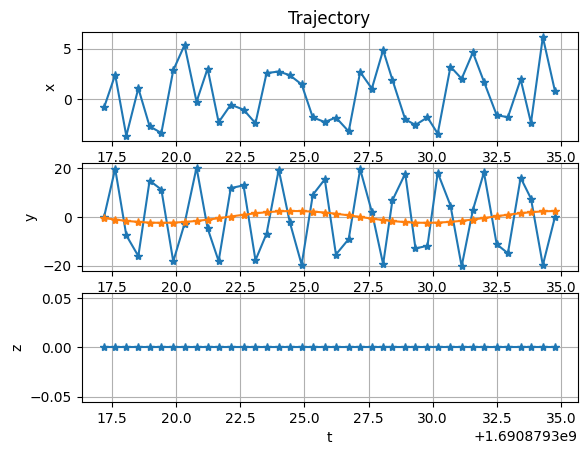

In [ ]:
guess_A = (z.max() - z.min()) / 2
guess_B = z.mean()
guess_w = guess_freq_z
guess_phi = 0
guess = [guess_A,guess_w,guess_phi,guess_B]
print(guess)
popt, pcov = curve_fit(fun, t, z ,guess)
print(np.linalg.cond(pcov),np.diag(pcov))

fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:,0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, z, "*-")
ax.plot(t, fun(t, popt[0],popt[1],popt[2],popt[3]),'*-')
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()